# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

import unidecode
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from bs4 import BeautifulSoup
import nltk
import contractions
import re


In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Our BA flight from Porto t...
1,✅ Trip Verified | The customer services (call ...
2,✅ Trip Verified | I am a frequent flyer with...
3,Not Verified | Flew with BA to Punta Cana. To...
4,✅ Trip Verified | They downgraded me from bu...


In [4]:
#df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
df.head()

,reviews
0,✅ Trip Verified | Our BA flight from Porto t...
1,✅ Trip Verified | The customer services (call ...
2,✅ Trip Verified | I am a frequent flyer with...
3,Not Verified | Flew with BA to Punta Cana. To...
4,✅ Trip Verified | They downgraded me from bu...


In [6]:
df.isna().sum()

reviews    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


# Visualize most occuring words in the corpus

In [9]:
# Creating word cloud for negative reviews
def create_wordcloud(data):
    negative_reviews = data

    words = ' '.join(negative_reviews['reviews'])

    cleaned_word = " ".join([word for word in words.split()])
    
    wordcloud = WordCloud(stopwords = STOPWORDS,
                      background_color = 'black',
                      width = 3000,
                      height = 2500
                     ).generate(cleaned_word)
    
    plt.figure(1, figsize = (12, 12))

    plt.imshow(wordcloud)

    plt.axis('off')

    plt.show() 

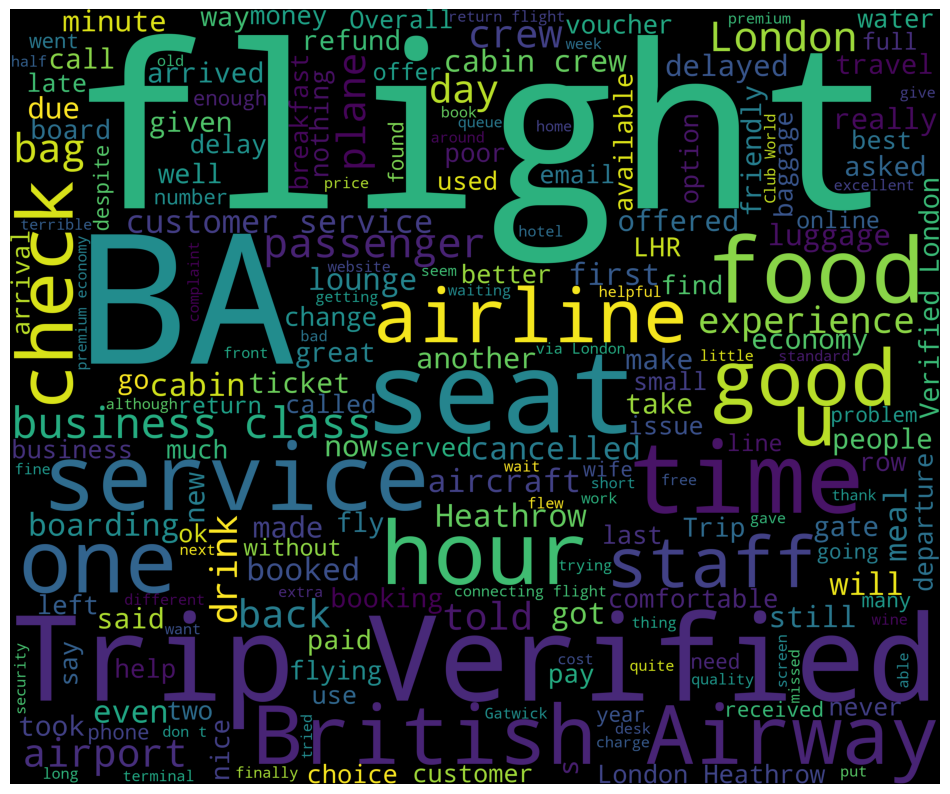

In [10]:
create_wordcloud(df)

# Treating Contractions in Text

In [11]:
import contractions

def replace_contractions(text):
  return contractions.fix(text)


# Let us fix the contractions in the data
df['reviews'] = df['reviews'].apply(lambda x: replace_contractions(x))

df.head()

,reviews
0,✅ Trip Verified | Our BA flight from Porto t...
1,✅ Trip Verified | The customer services (call ...
2,✅ Trip Verified | I am a frequent flyer with...
3,Not Verified | Flew with BA to Punta Cana. To...
4,✅ Trip Verified | They downgraded me from bu...


# Removing Special Characters

In [12]:
import re

def remove_special_chars(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return text

df['reviews'] = df['reviews'].apply(lambda x: remove_special_chars(x))

df.head()

,reviews
0,Trip Verified Our BA flight from Porto to ...
1,Trip Verified The customer services call cen...
2,Trip Verified I am a frequent flyer with B...
3,Not Verified Flew with BA to Punta Cana Took...
4,Trip Verified They downgraded me from busi...


# Normalising the Text-Casing

In [13]:
def convert_to_lower(text):
    return text.lower()

df['reviews'] = df['reviews'].apply(lambda x: convert_to_lower(x))
df.head()

,reviews
0,trip verified our ba flight from porto to ...
1,trip verified the customer services call cen...
2,trip verified i am a frequent flyer with b...
3,not verified flew with ba to punta cana took...
4,trip verified they downgraded me from busi...


# Removing "Trip Verified" and "Not Verified" from the texts

In [14]:

# Define the word to remove
word_to_remove = "trip verified"

# Function to remove the word
def remove_word(text, word_to_remove):
    text = re.sub(r'\b' + re.escape(word_to_remove) + r'\b', '', text, flags=re.I)
    return text.strip()

# Apply the remove_word function to the 'reviews' column
df['reviews'] = df['reviews'].apply(lambda x: remove_word(x, word_to_remove))

df

,reviews
0,our ba flight from porto to london heathrow t5...
1,the customer services call centres etc are atr...
2,i am a frequent flyer with ba and have been fo...
3,not verified flew with ba to punta cana took...
4,they downgraded me from business to premium ec...
...,...
995,london to kuala lumpur this is my first time f...
996,los angeles to london heathrow very poor custo...
997,our flight from seattle to london in november ...
998,gatwick to barbados we flew out of gatwick on ...


In [15]:

# Define the word to remove
word_to_remove = "not verified"

# Function to remove the word
def remove_word(text, word_to_remove):
    text = re.sub(r'\b' + re.escape(word_to_remove) + r'\b', '', text, flags=re.I)
    return text.strip()

# Apply the remove_word function to the 'reviews' column
df['reviews'] = df['reviews'].apply(lambda x: remove_word(x, word_to_remove))

df

,reviews
0,our ba flight from porto to london heathrow t5...
1,the customer services call centres etc are atr...
2,i am a frequent flyer with ba and have been fo...
3,flew with ba to punta cana took the trouble to...
4,they downgraded me from business to premium ec...
...,...
995,london to kuala lumpur this is my first time f...
996,los angeles to london heathrow very poor custo...
997,our flight from seattle to london in november ...
998,gatwick to barbados we flew out of gatwick on ...


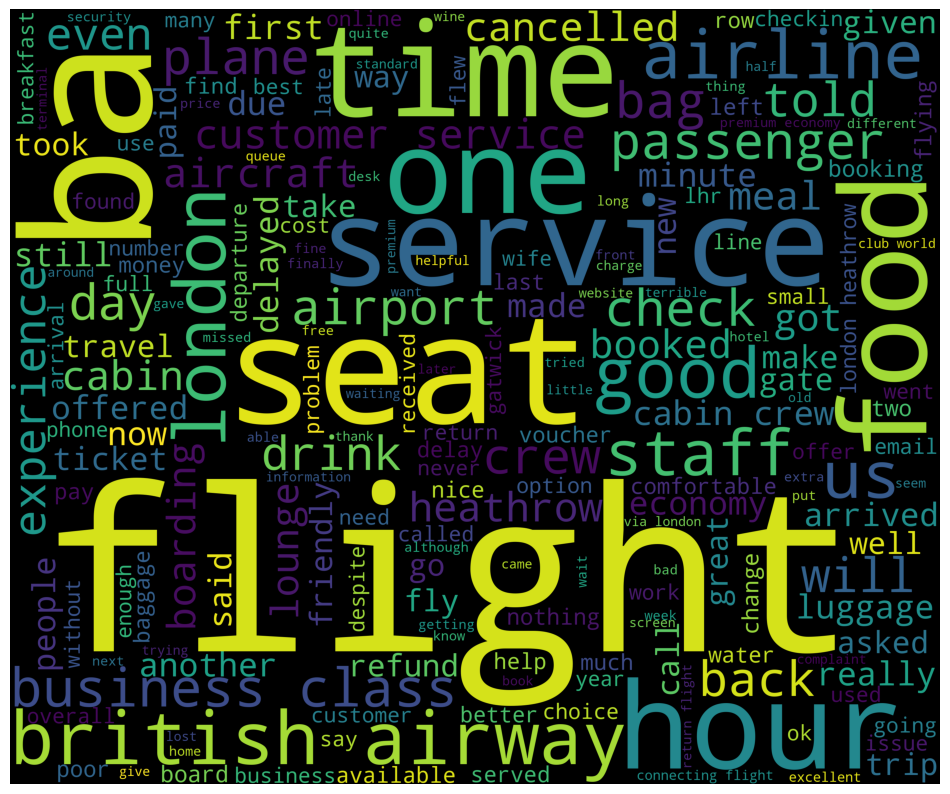

In [16]:
create_wordcloud(df)

# Tokenization

In [17]:
df['reviews'] = df.apply(lambda row: nltk.word_tokenize(row['reviews']), axis = 1)
df.head()

,reviews
0,"[our, ba, flight, from, porto, to, london, hea..."
1,"[the, customer, services, call, centres, etc, ..."
2,"[i, am, a, frequent, flyer, with, ba, and, hav..."
3,"[flew, with, ba, to, punta, cana, took, the, t..."
4,"[they, downgraded, me, from, business, to, pre..."


In [18]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
python -m textblob.download_corpora


SyntaxError: invalid syntax (2561482677.py, line 1)

In [ ]:
from textblob import TextBlob

reviews = df['reviews']

# Analyze sentiment of each review
sentiments = [TextBlob(review).sentiment for review in reviews]

# Extract polarity and subjectivity
polarities = [sentiment.polarity for sentiment in sentiments]
subjectivities = [sentiment.subjectivity for sentiment in sentiments]

# Calculate the average sentiment
average_polarity = sum(polarities) / len(polarities)
average_subjectivity = sum(subjectivities) / len(subjectivities)

# Print or visualize the results
print(f"Average Polarity: {average_polarity}")
print(f"Average Subjectivity: {average_subjectivity}")


In [ ]:
import matplotlib.pyplot as plt

# Sample list of polarity values (replace this with your actual data)
polarities = [0.1, -0.2, 0.3, -0.1, 0.2, 0.4, -0.3, -0.4, 0.5, -0.5]

# Create a histogram
plt.hist(polarities, bins=10, range=(-1, 1), edgecolor='black')

# Customize the plot
plt.title('Sentiment Polarity Histogram')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

# Show the plot
plt.show()


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['reviews']))

# Access the word frequencies
word_frequencies = wordcloud.process_text(" ".join(df['reviews']))

# Sort the word frequencies by count in descending order
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

# Display the most occurring words
num_words_to_display = 10  # You can change this number
for word, count in sorted_word_frequencies[:num_words_to_display]:
    print(f"{word}: {count}")

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud")

# Save the word cloud as an image file (e.g., PNG)
plt.savefig('wordcloud.png', bbox_inches='tight')

# Show the word cloud
plt.show()


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['reviews']))

# Access the word frequencies and sort them by count in descending order
word_frequencies = wordcloud.process_text(" ".join(df['reviews']))
sorted_word_frequencies = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)

# Extract the most occurring words and their counts
num_words_to_display = 10  # Number of most occurring words to display
most_occurring_words = [word for word, count in sorted_word_frequencies[:num_words_to_display]]
word_counts = [count for word, count in sorted_word_frequencies[:num_words_to_display]]

# Create a histogram
plt.figure(figsize=(12, 6))
plt.barh(most_occurring_words, word_counts)
plt.xlabel("Word Count")
plt.ylabel("Words")
plt.title("Most Occurring Words and Their Total Occurrences")

# Display the histogram
plt.show()


In [ ]:
df.head()

In [20]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

def remove_stopwords(row):
  words = [word for word in row if word not in stop_words]
  return words

df['reviews'] = df['reviews'].apply(lambda x: remove_stopwords(x))

df.head(2)

,reviews
0,"[ba, flight, porto, london, heathrow, t5, oper..."
1,"[customer, services, call, centres, etc, atroc..."


In [21]:
import re  # Import the 're' module

def join_words(row):
  words = " ".join([word for word in row])
  words = re.sub('[^a-zA-Z]', " ", words)
  return words

df['reviews'] = df['reviews'].apply(lambda x: join_words(x))

df.head()


,reviews
0,ba flight porto london heathrow t operated fi...
1,customer services call centres etc atrocious s...
2,frequent flyer ba last years noted ratings ...
3,flew ba punta cana took trouble reserve seats ...
4,downgraded business premium economy took three...
